## Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

## Content
- price price in US dollars (326--18,823)

- carat weight of the diamond (0.2--5.01)

- cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- color diamond colour, from J (worst) to D (best)

- clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- x length in mm (0--10.74)

- y width in mm (0--58.9)

- z depth in mm (0--31.8)

- depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

- table width of top of diamond relative to widest point (43--95)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import cluster
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
diamond = pd.read_csv("diamonds.csv")
diamond.head()

,srno,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamond.describe()

,srno,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
diamond = diamond.drop(['srno'], axis=1)
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamond.drop(diamond[diamond['x']==0].index,inplace=True)
diamond.drop(diamond[diamond['y']==0].index,inplace=True)
diamond.drop(diamond[diamond['z']==0].index,inplace=True)

In [6]:
diamond.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [7]:
diamond.shape

(53920, 10)

In [8]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
categorical_vars = ['cut','color','clarity']
cat = diamond[categorical_vars]
cat.describe()

,cut,color,clarity
count,53920,53920,53920
unique,5,7,8
top,Ideal,G,SI1
freq,21548,11284,13063


## Visualising our data with respect to various attributes

In [10]:
diamond.cut.value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

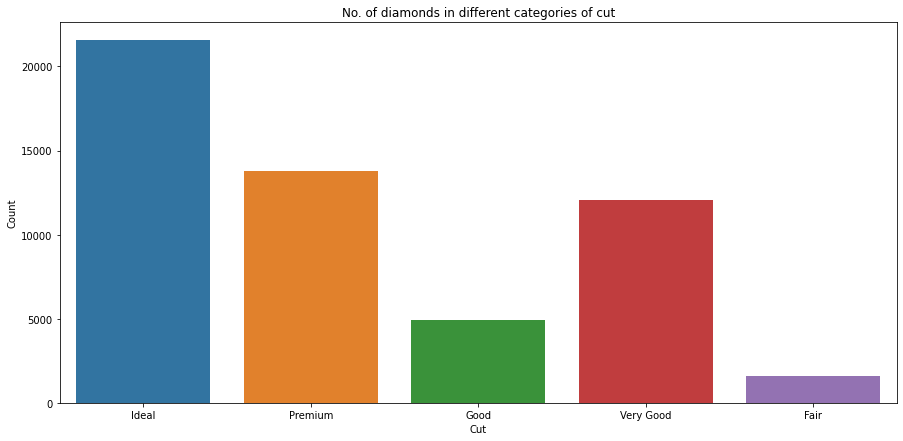

In [11]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x = 'cut', data = diamond)
plt.title("No. of diamonds in different categories of cut")
plt.xlabel("Cut")
plt.ylabel("Count")
plt.show()

In [12]:
diamond.clarity.value_counts()

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

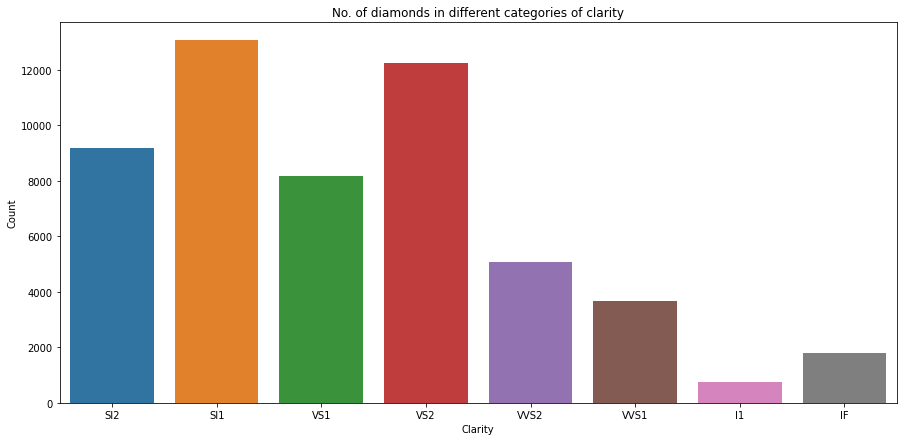

In [13]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x = 'clarity', data = diamond)
plt.title("No. of diamonds in different categories of clarity")
plt.xlabel("Clarity")
plt.ylabel("Count")
plt.show()

In [14]:
diamond.color.value_counts()

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

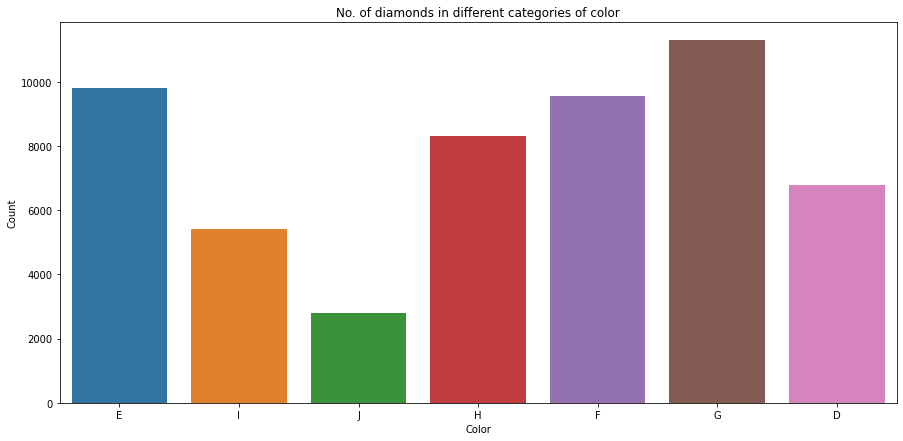

In [15]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x = 'color', data = diamond)
plt.title("No. of diamonds in different categories of color")
plt.xlabel("Color")
plt.ylabel("Count")
plt.show()

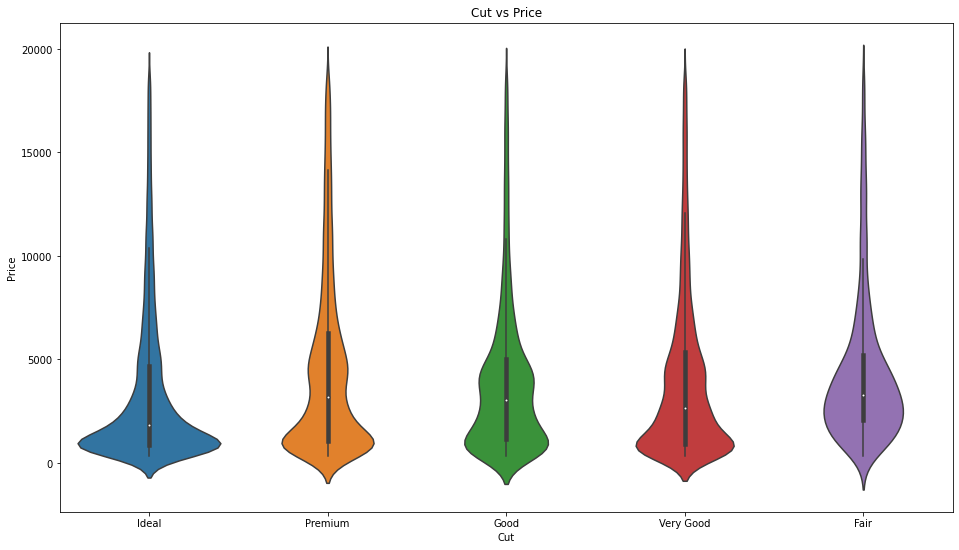

In [16]:
fig = plt.figure(figsize=(16,9))
sns.violinplot(y=diamond.price,x=diamond.cut)
plt.title("Cut vs Price")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

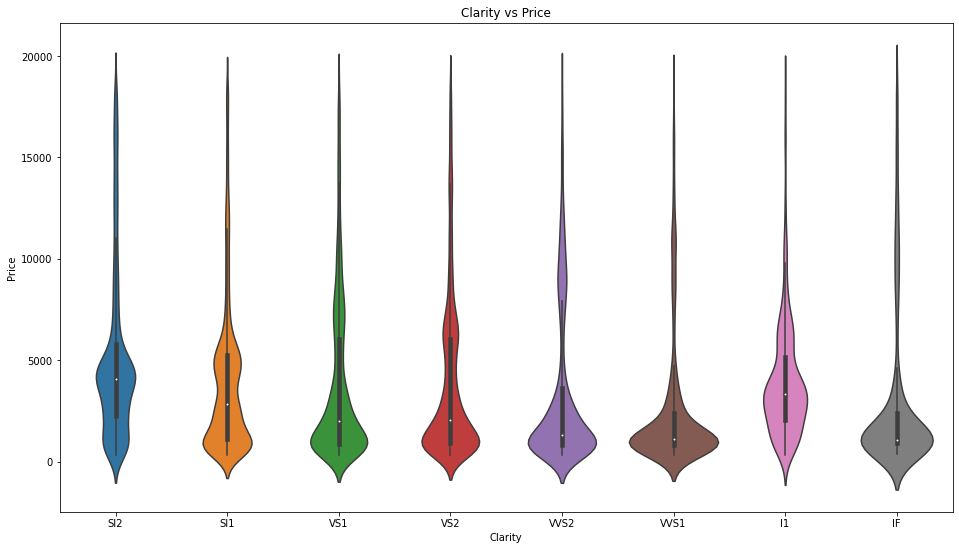

In [17]:
fig = plt.figure(figsize=(16,9))
sns.violinplot(y=diamond.price,x=diamond.clarity)
plt.title("Clarity vs Price")
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.show()

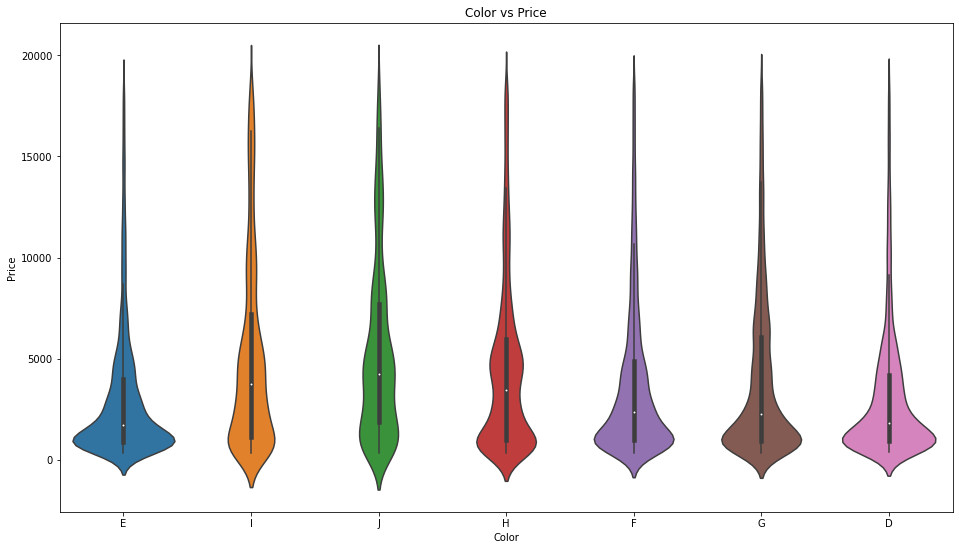

In [18]:
fig = plt.figure(figsize=(16,9))
sns.violinplot(y=diamond.price,x=diamond.color)
plt.title("Color vs Price")
plt.xlabel("Color")
plt.ylabel("Price")
plt.show()

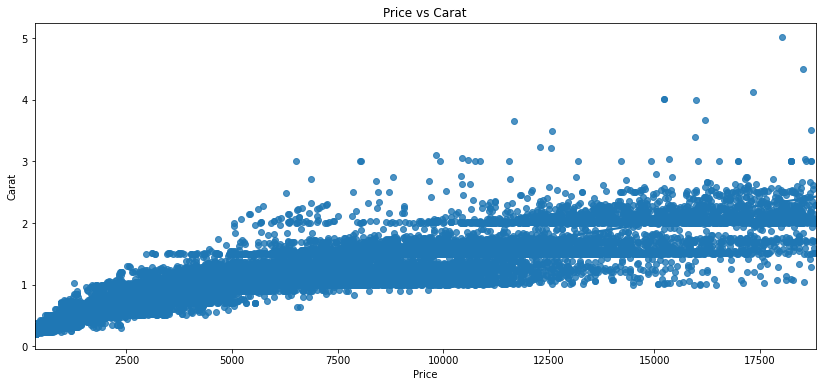

In [19]:
fig = plt.figure(figsize=(14,6))
sns.regplot(x=diamond.price,y=diamond.carat)
plt.title('Price vs Carat')
plt.xlabel("Price")
plt.ylabel("Carat")
plt.show()

The graph depicts that as the carats increase price increases as well. This is expected as far as diamonds are concerned.

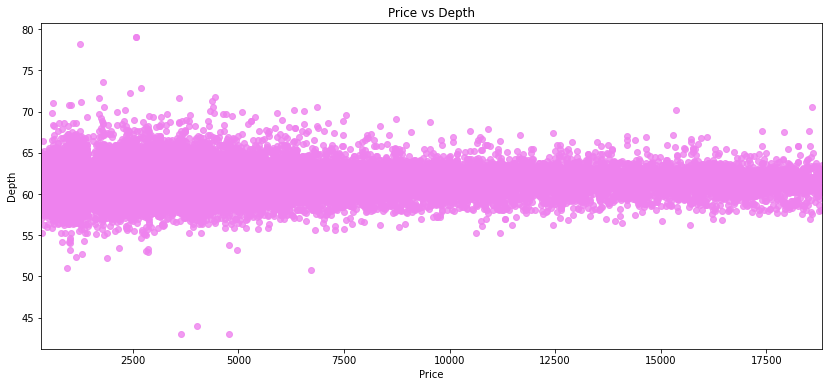

In [20]:
fig = plt.figure(figsize=(14,6))
sns.regplot(x=diamond.price,y=diamond.depth,color='violet')
plt.title('Price vs Depth')
plt.xlabel("Price")
plt.ylabel("Depth")
plt.show()

Here we can see that depth does not have much effect on price. This would mean that price of diamond depends on other attributes as well.

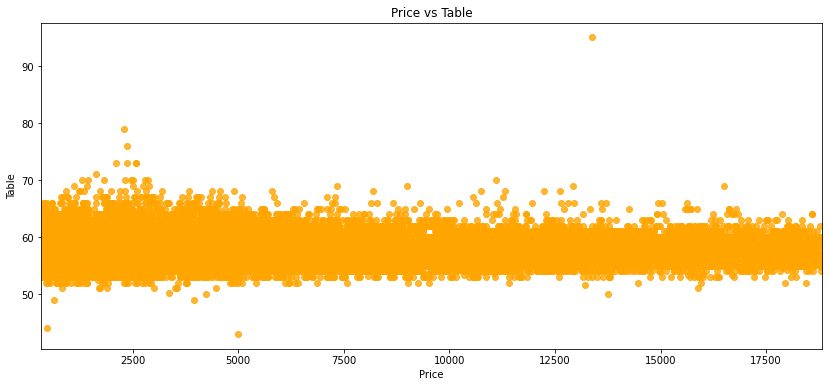

In [21]:
fig = plt.figure(figsize=(14,6))
sns.regplot(x=diamond.price,y=diamond.table,color='orange')
plt.title('Price vs Table')
plt.xlabel("Price")
plt.ylabel("Table")
plt.show()

This is similar to depth. Price of diamond depends other attributes like color, clarity, etc.

<Figure size 720x432 with 0 Axes>

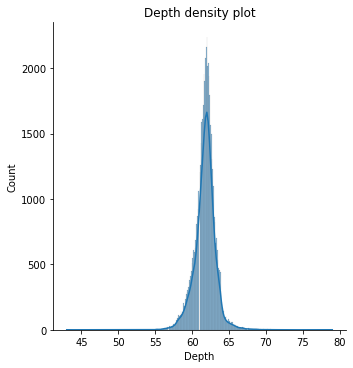

In [22]:
fig = plt.figure(figsize=(10,6))

sns.displot(diamond.depth,kde=True)
plt.title('Depth density plot')
plt.xlabel("Depth")
plt.ylabel("Count")
plt.show()

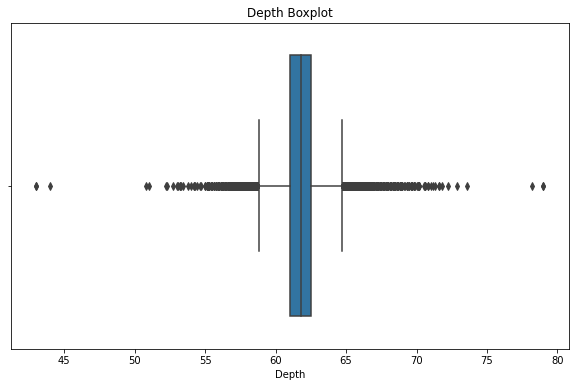

In [23]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(diamond.depth)
plt.title('Depth Boxplot')
plt.xlabel("Depth")
plt.show()

<Figure size 720x432 with 0 Axes>

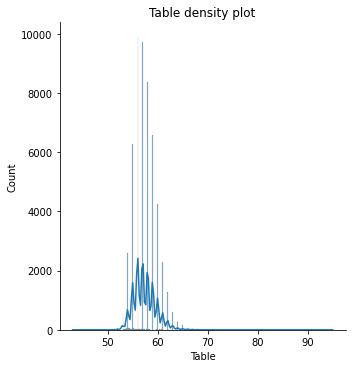

In [24]:
fig = plt.figure(figsize=(10,6))

sns.displot(diamond.table,kde=True)
plt.title('Table density plot')
plt.xlabel("Table")
plt.ylabel("Count")
plt.show()

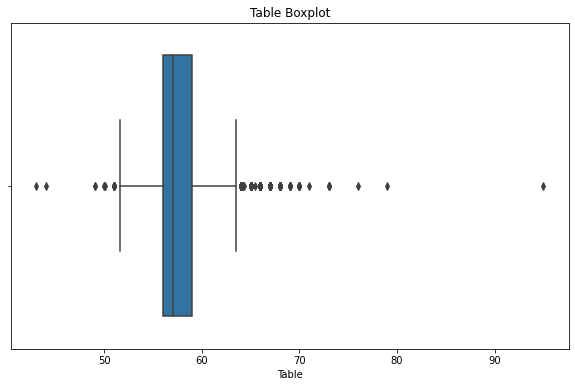

In [25]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(diamond.table)
plt.title('Table Boxplot')
plt.xlabel("Table")
plt.show()

<AxesSubplot:>

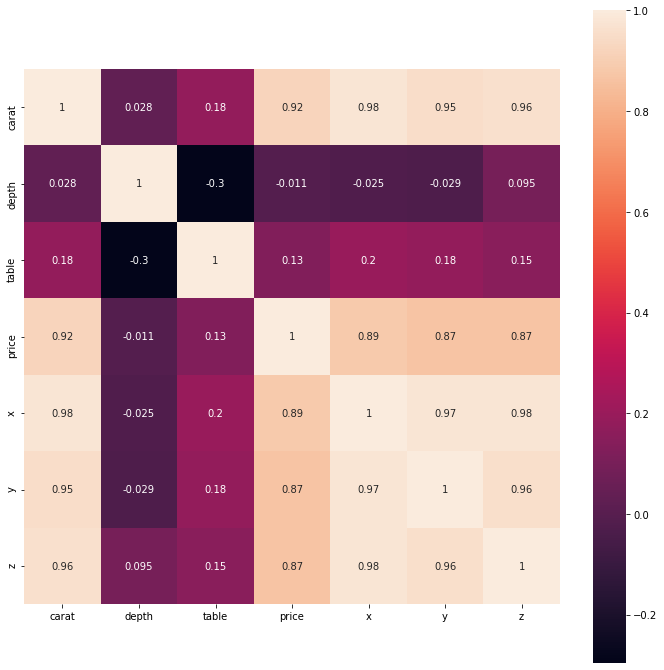

In [26]:
plt.figure(figsize = (12,12))
sns.heatmap(data = diamond.corr(), square = True, annot = True)

In [27]:
df = diamond

In [28]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [29]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [30]:
encoder = LabelEncoder()

encoder.fit(df['cut'])
df['cut'] = encoder.transform(df['cut'])

encoder.fit(df['color'])
df['color'] = encoder.transform(df['color'])

encoder.fit(df['clarity'])
df['clarity'] = encoder.transform(df['clarity'])

df.dtypes

carat      float64
cut          int32
color        int32
clarity      int32
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [31]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [32]:
df.color.value_counts()

3    11284
1     9797
2     9538
4     8298
0     6774
5     5421
6     2808
Name: color, dtype: int64

In [33]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

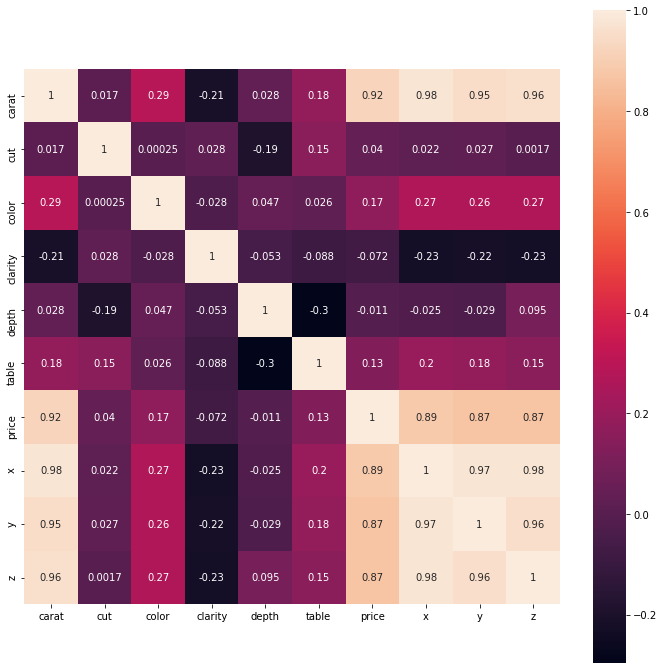

In [34]:
plt.figure(figsize = (12,12))
sns.heatmap(data = df.corr(), square = True, annot = True);

Unexpectedly, it seems that price is not highly correlated to cut, color, clarity. On the other hand, it is highly correlated to carat and size (x,y and z) of the diamond which is understandable.

Calculating the quantiles

In [35]:
q_hi_depth = df["depth"].quantile(0.99)
q_low_depth = df["depth"].quantile(0.01)
q_hi_table = df["table"].quantile(0.99)
q_low_table = df["table"].quantile(0.01)
q_hi_x = df["x"].quantile(0.99)
q_hi_y = df["y"].quantile(0.99)
q_hi_z = df["z"].quantile(0.99)
q_low_z = df["z"].quantile(0.01)

Removing outliers using quantiles

In [36]:
df_filtered = df[(df['depth']<q_hi_depth) &  (df['depth']>q_low_depth)]
df_filtered = df[(df['table']<q_hi_table) &  (df['table']>q_low_table)]
df_filtered = df[df['x']<q_hi_x]
df_filtered = df[df['y']<q_hi_y]
df_filtered = df[(df['z']<q_hi_z) &  (df['z']>q_low_z)]

In [37]:
df_filtered.shape

(52778, 10)

Train-Test split

In [38]:
X = df_filtered.drop(['price'], axis=1)
y = df_filtered['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Supervised Models

1) Linear Regression

In [41]:
help(lr.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)

accuracy_lr = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 8, verbose = 1)
r2_lr = r2_score(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)

print(f'Accuracy is {accuracy_lr}')
print(f'r2_Score is {r2_lr}')
print(f'Mean Squared error is {mse_lr}')

Accuracy is [0.88848718 0.89524898 0.89412716 0.88897927 0.89256063 0.8224155
 0.89152679 0.89936298]
r2_Score is 0.8961815182281967
Mean Squared error is 1509487.0827692174


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


2) Random Forest Regressor

In [42]:
rand_f = RandomForestRegressor(max_depth=2, random_state=0)
rand_f.fit(X_train, y_train)


y_pred = rand_f.predict(X_test)

accuracy_rand_f = cross_val_score(estimator = rand_f, X = X_train, y = y_train, cv = 8, verbose = 1)
r2_rand_f = r2_score(y_test, y_pred)
mse_rand_f = mean_squared_error(y_test, y_pred)

print(f'Accuracy is {accuracy_rand_f}')
print(f'r2_Score is {r2_rand_f}')
print(f'Mean Squared error is {mse_rand_f}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy is [0.82463574 0.83076776 0.83090469 0.81633279 0.82166609 0.82088773
 0.82559465 0.83133387]
r2_Score is 0.8251278655570089
Mean Squared error is 2542584.1677995855


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.3s finished


3) KNeighbours Regressor

In [43]:
kn = KNeighborsRegressor(n_neighbors = 2)
kn.fit(X_train, y_train)


y_pred = kn.predict(X_test)

accuracy_kn = cross_val_score(estimator = kn, X = X_train, y = y_train, cv = 8, verbose = 1)
r2_kn = r2_score(y_test, y_pred)
mse_kn = mean_squared_error(y_test, y_pred)

print(f'Accuracy is {accuracy_kn}')
print(f'r2_Score is {r2_kn}')
print(f'Mean Squared error is {mse_kn}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy is [0.93472388 0.92660811 0.93867928 0.93231769 0.94150703 0.93016416
 0.93315163 0.93711006]
r2_Score is 0.935301035211224
Mean Squared error is 940701.9824453121


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.6s finished


4) Decision Tree Regressor

In [44]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train, y_train)


y_pred = dtree.predict(X_test)

accuracy_dtree = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 8, verbose = 1)
r2_dtree = r2_score(y_test, y_pred)
mse_dtree = mean_squared_error(y_test, y_pred)

print(f'Accuracy is {accuracy_dtree}')
print(f'r2_Score is {r2_dtree}')
print(f'Mean Squared error is {mse_dtree}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy is [0.96537694 0.9641566  0.96291133 0.96231682 0.96451725 0.9641623
 0.96605458 0.96281685]
r2_Score is 0.963198970343117
Mean Squared error is 535075.0459034276


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.1s finished


In [45]:
supr_models = pd.DataFrame({'Model':['Linear Regression', 'RandomForest Regression', 'KNeighbours Regression',
                              'Decision Tree Regressor'],
                     'R2_Score':[r2_lr, r2_rand_f, r2_kn, r2_dtree]}, index=[1,2,3,4])
supr_models

,Model,R2_Score
1,Linear Regression,0.896182
2,RandomForest Regression,0.825128
3,KNeighbours Regression,0.935301
4,Decision Tree Regressor,0.963199


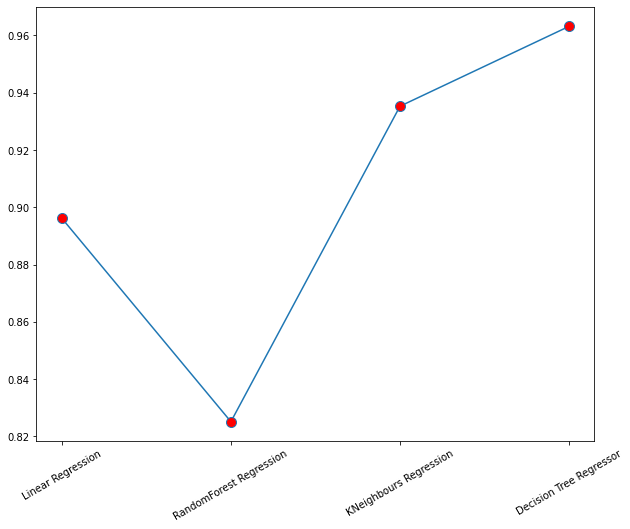

In [46]:
fig = plt.figure(figsize=(10,8))
plt.plot(supr_models.Model, supr_models.R2_Score, marker='o', mfc = 'r', ms = 10)
plt.xticks(rotation=30)
plt.show()

### Unsupervised Model

In [47]:
range_n_clusters = list(range(2,11))
completeness = []
homogeneity = []
silhouette = []
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    temp_c = metrics.completeness_score(y,cluster_labels)
    completeness.append(temp_c)
    temp_h = metrics.homogeneity_score(y,cluster_labels)
    homogeneity.append(temp_h)
    temp_s = silhouette_score(X, cluster_labels)
    silhouette.append(temp_s)

In [48]:
data = {'Completeness': completeness, 'Homogeneity': homogeneity, 'Silhouette': silhouette}
rows = ['cluster = 2', 'cluster = 3', 'cluster = 4', 'cluster = 5', 'cluster = 6', 'cluster = 7', 
         'cluster = 8', 'cluster = 9', 'cluster = 10']
unsupr_models = pd.DataFrame(data, index=rows)
unsupr_models

,Completeness,Homogeneity,Silhouette
cluster = 2,0.329389,0.025829,0.207194
cluster = 3,0.445517,0.055224,0.183685
cluster = 4,0.445744,0.070857,0.177811
cluster = 5,0.445392,0.081515,0.168147
cluster = 6,0.453311,0.091272,0.165900
cluster = 7,0.473965,0.103944,0.161442
cluster = 8,0.481065,0.114340,0.156587
cluster = 9,0.488572,0.121330,0.163238
cluster = 10,0.499724,0.130182,0.158093


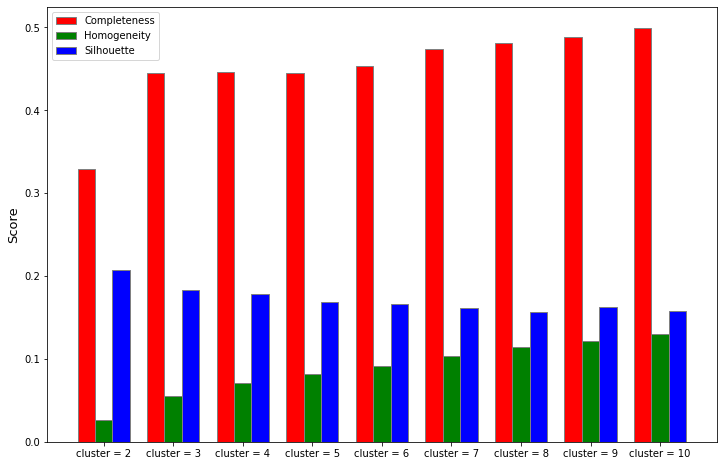

In [49]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# Set position of bar on X axis
br1 = np.arange(len(completeness))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, completeness, color ='r', width = barWidth,
        edgecolor ='grey', label ='Completeness')
plt.bar(br2, homogeneity, color ='g', width = barWidth,
        edgecolor ='grey', label ='Homogeneity')
plt.bar(br3, silhouette, color ='b', width = barWidth,
        edgecolor ='grey', label ='Silhouette')
 
plt.ylabel('Score', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(completeness))], rows)
 
plt.legend()
plt.show()